<a href="https://colab.research.google.com/github/MichalStrus/K_Means_clustering/blob/main/Simple_KMeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

In [84]:
df = pd.read_csv("/content/drive/MyDrive/force2020_data_unsupervised_learning.csv")

In [85]:
df.describe()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
count,18270.000000,18270.000000,18270.000000,14032.000000,16440.000000,18189.000000
mean,2.110451,63.847477,1883.228478,0.404547,3.463851,125.106178
std,0.297725,28.636331,801.941195,0.133532,2.561239,30.618337
min,1.404576,6.191506,494.528000,0.024330,1.010027,55.726753
25%,1.963399,43.866690,1188.750000,0.315346,2.320836,90.883087
50%,2.055079,66.777851,1882.972000,0.448527,2.790249,141.300461
75%,2.381963,81.542681,2577.802000,0.506343,4.267342,148.048355
max,2.927888,499.022583,3272.024000,0.800262,66.030319,175.953140


In [86]:
df.dtypes

RHOB        float64
GR          float64
DEPTH_MD    float64
NPHI        float64
PEF         float64
DTC         float64
dtype: object

In [87]:
df.isna().sum()

RHOB           0
GR             0
DEPTH_MD       0
NPHI        4238
PEF         1830
DTC           81
dtype: int64

In [88]:
columns = df.columns
imp = SimpleImputer(strategy='mean')
df = pd.DataFrame(imp.fit_transform(df), columns=columns)

In [89]:
df.describe()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
count,18270.000000,18270.000000,18270.000000,18270.000000,18270.000000,18270.000000
mean,2.110451,63.847477,1883.228478,0.404547,3.463851,125.106178
std,0.297725,28.636331,801.941195,0.117023,2.429575,30.550384
min,1.404576,6.191506,494.528000,0.024330,1.010027,55.726753
25%,1.963399,43.866690,1188.750000,0.344193,2.355565,90.948286
50%,2.055079,66.777851,1882.972000,0.404547,2.988451,141.197800
75%,2.381963,81.542681,2577.802000,0.491632,4.046910,148.012402
max,2.927888,499.022583,3272.024000,0.800262,66.030319,175.953140


In [90]:
scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(df), columns=columns)

In [91]:
df_std.describe()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
count,1.827000e+04,1.827000e+04,1.827000e+04,1.827000e+04,1.827000e+04,1.827000e+04
mean,7.467116e-17,1.244519e-16,-3.484654e-16,-2.240135e-16,-2.177909e-17,-2.489039e-17
std,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00
min,-2.370957e+00,-2.013441e+00,-1.731721e+00,-3.249161e+00,-1.010008e+00,-2.271046e+00
25%,-4.939290e-01,-6.977617e-01,-8.660205e-01,-5.157606e-01,-4.561767e-01,-1.118114e+00
50%,-1.859859e-01,1.023334e-01,-3.198304e-04,-4.743732e-16,-1.956771e-01,5.267385e-01
75%,9.119809e-01,6.179454e-01,8.661390e-01,7.441906e-01,2.399905e-01,7.498056e-01
max,2.745683e+00,1.519702e+01,1.731840e+00,3.381601e+00,2.575272e+01,1.664410e+00


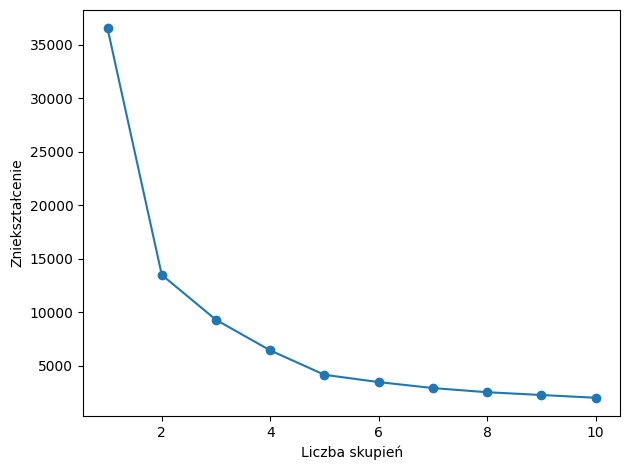

In [92]:
distortions = []
for i in range(1,11):
  km = KMeans(n_clusters = i, init='k-means++', n_init=10, max_iter = 300, random_state=0)
  km.fit(df_std[['RHOB', 'NPHI']])
  distortions.append(km.inertia_)
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Liczba skupień')
plt.ylabel('Zniekształcenie')
plt.tight_layout()
plt.show()

In [93]:
df_std = df_std[['RHOB', 'NPHI']]

In [94]:
kmeans = KMeans(n_clusters = 3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-95-8f895d0ccdbc>:4: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(df_std.iloc[y_km == 2, 0], df_std.iloc[y_km == 2, 1], s =50, c='blue', edgecolor = 'black', marker = 'x', label = 'Skupienie 3')


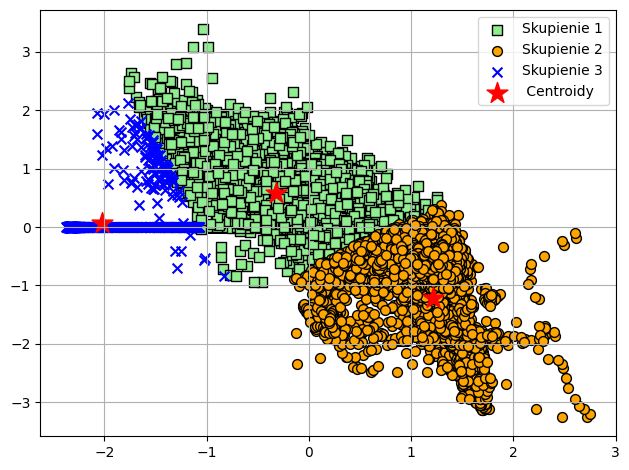

In [95]:
y_km = kmeans.fit_predict(df_std)
plt.scatter(df_std.iloc[y_km == 0, 0], df_std.iloc[y_km == 0, 1], s =50, c='lightgreen', edgecolor = 'black', marker = 's', label = 'Skupienie 1')
plt.scatter(df_std.iloc[y_km == 1, 0], df_std.iloc[y_km == 1, 1], s =50, c='orange', edgecolor = 'black', marker = 'o', label = 'Skupienie 2')
plt.scatter(df_std.iloc[y_km == 2, 0], df_std.iloc[y_km == 2, 1], s =50, c='blue', edgecolor = 'black', marker = 'x', label = 'Skupienie 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=250, marker = '*', c='red', label=' Centroidy')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [96]:
for i in range(1,7):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df_std)
  df_std[f'Means_{i}'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [97]:
df_std

,RHOB,NPHI,Means_1,Means_2,Means_3,Means_4,Means_5,Means_6
0,-0.759999,-4.743732e-16,0,0,1,3,1,2
1,-0.741163,-4.743732e-16,0,0,1,3,1,2
2,-0.718560,-4.743732e-16,0,0,1,3,1,2
3,-0.734045,-4.743732e-16,0,0,1,3,1,2
4,-0.773944,-4.743732e-16,0,0,1,3,1,2
...,...,...,...,...,...,...,...,...
18265,1.745819,-1.852130e+00,0,1,2,1,4,3
18266,1.789158,-1.871240e+00,0,1,2,1,4,3
18267,1.917421,-1.952429e+00,0,1,2,1,4,3
18268,2.109002,-1.964875e+00,0,1,2,1,4,3


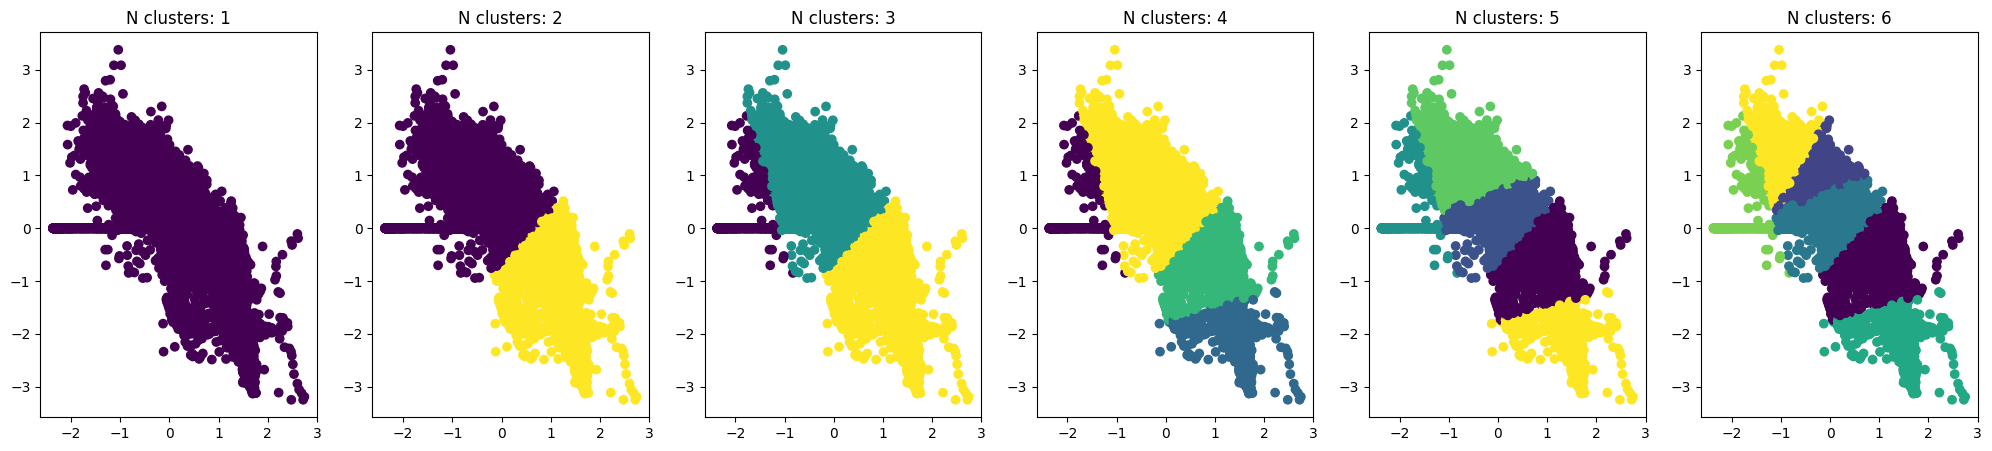

In [98]:
fig, axs = plt.subplots(nrows =1, ncols=6, figsize = (25,5))
for i, ax in enumerate(fig.axes, start=1):
  ax.scatter(x=df_std['RHOB'], y = df_std['NPHI'], c=df_std[f'Means_{i}'])
  ax.set_title(f'N clusters: {i}')